# python包sympy在物理工程和数学的应用导论

In [3]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction
设定一个变量x如下

In [3]:
x=smp.symbols('x')
x

x

In [12]:
print(x **2)
print(smp.cos(x))
y=smp.sin(x)
y

x**2
cos(x)


sin(x)

## 复习：这样利用sympy就可以构建很多方程了

In [36]:
y=x**2+4*x+3
print(y)

z=y**2
print(z)

#因式分解
fac=z.factor()
print(fac)

#扩展多项式
expd=z.expand()
print(expd)

z.as_poly()

x**2 + 4*x + 3
(x**2 + 4*x + 3)**2
(x + 1)**2*(x + 3)**2
x**4 + 8*x**3 + 22*x**2 + 24*x + 9


Poly(x**4 + 8*x**3 + 22*x**2 + 24*x + 9, x, domain='ZZ')

使用 ```smp.solve(f,x)``` 时，总会去找所有使得函数$f(x)=0$的解

In [38]:
#解方程  注意 五次多项式以上无根式解
smp.solve(z,x) 

[-3, -1]

In [39]:
smp.solve(smp.sin(x),x)

[0, pi]

### 注：在整个后期方程的变化变得复杂之前，如果能够定义变量的数据类型就尽早定义，否则后期复杂操作会导致sympy挤满内存造成内存泄露

In [50]:
x=smp.symbols('x')
res =smp.solve(x**2+1,x) 
print(res)
x=smp.symbols('x',real=True)
res=smp.solve(x**2+1,x) 
print(res) 

[-I, I]
[]


In [51]:
x=smp.symbols('x',real=True )
res =smp.solve(x +4,x) 
print(res)
#注意这里指定了正数，该正负指定对于虚数i无用
x=smp.symbols('x',real=True,positive=True)
res =smp.solve(x +4,x) 
print(res)

[-4]
[]


可指定多个变量

In [4]:
x,y,z=smp.symbols('x y z')
F= x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

In [65]:
#此时需要寻找F=0的x的解 使用 yz表达
x_sols=smp.solve(F,x)
print(x_sols)
y_sols=smp.solve(F,y)
print(y_sols)
z_sols=smp.solve(F,z)
print(z_sols)

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]
[-x**2/sin(z)]
[asin(x**2/y) + pi, -asin(x**2/y)]


然后把方程转为数值函数，在matplot上显示出来

In [69]:
expr= z_sols[0]
print(expr)
#给予函数一组变量数字用以计算
expr_f=smp.lambdify([x,y],expr)
expr_f(1,2) 

asin(x**2/y) + pi


3.6651914291880923

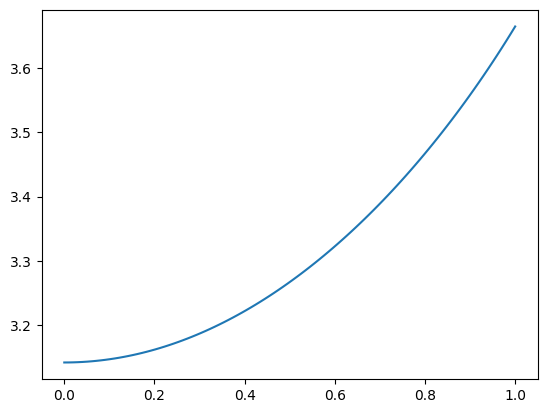

In [74]:
x_num=np.linspace(0,1,100)
y_num=2
plt.plot(x_num,expr_f(x_num,y_num))
plt.show()

多元方程可以对变量做赋值，甚至于替换变量

In [5]:
print(F)
res=F.subs([(y,smp.cos(z))])
print(res)
res=F.subs([(y,smp.cos(z)),(z,smp.pi/2)])
print(res)

x**2 + y*sin(z)
x**2 + sin(z)*cos(z)
x**2


## 样例 下落物体
一个下落的物体，和一个平台，都在重力加速度影响下下落，其方程如下
\
Object:$h_o(t)=h_0-v_0t-\frac12gt^2$
\
Platform:$h_p(t)=v_pt+\frac12qt^2$
\
找出一个初始速度 $v_0$ 使得物体和平台在等速的时候相撞；
\
根据条件碰撞时高度相同，速度也相同，那么我们要解开两个联立的等式：\
$h_o(t)=h_p(t)$\
$\frac{dh_0}{d_t}(t)=-\frac{dh_p}{dt}(t)$\
由于在sympy中是右侧为0的方程解法，那么处理一下\
$h_o(t)-h_p(t)=0$\
$\frac{dh_0}{d_t}(t)+\frac{dh_p}{dt}(t)=0$\
\
那么可以开始编程

In [6]:
t,h0,v0,g,vp,q=smp.symbols('t h_0 v_0 g v_p q',real=True,positive=True)


In [9]:
#Rational表达严格数学上的分数含义 而非计算机的除法  可保证精度
h0t=h0-v0*t-smp.Rational(1,2)*g*t**2
dh0_dt=g*t-v0
hpt=vp*t+smp.Rational(1,2)*g*t**2
dhp_dt=vp+q*t

In [10]:
eq1=h0t-hpt
eq2=dh0_dt+dhp_dt

In [11]:
#连立方程解法   并取出第一对解
t_collide,v_initfall=smp.solve([eq1,eq2],[t,v0])[0]

In [13]:
smp.solve([eq1,eq2],[t,v0])[0][0]

(g*v_p/(2*g + q) - v_p - (g + q)*sqrt(2*g*h_0 + h_0*q + v_p**2)/(2*g + q))/(g + q)

In [14]:
v_initfall

g*v_p/(2*g + q) - (g + q)*sqrt(2*g*h_0 + h_0*q + v_p**2)/(2*g + q)

In [15]:
dh0_dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-2*g*v_p + q*sqrt(2*g*h_0 + h_0*q + v_p**2))/(2*g + q)

In [17]:
dhp_dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(2*g*v_p - q*sqrt(2*g*h_0 + h_0*q + v_p**2))/(2*g + q)

# 微积分 第一年

In [3]:
x=smp.symbols('x')

## 极限
$$
\lim\limits_{x\to\pi}\sin(\frac x2+\sin x)
$$

In [5]:
expr_lim = smp.sin(x/2+smp.sin(x))
smp.limit(expr_lim,x,smp.pi)

1

## 微分
$$
\frac d{dx}(\frac{1+\sin x}{1-\cos x})^2
$$

In [14]:
expr_diff=((1+smp.sin(x))/(1-smp.cos(x)))**2
smp.diff(expr_diff,x) 

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$
\frac d{dx} f(x+g(x))
$$

In [15]:
f,g = smp.symbols('f g',cls=smp.Function)
g=g(x)
f=f(x+g)

In [16]:
f

f(x + g(x))

In [17]:
dfdx=smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [21]:
#对式子内任意组分的替换
dfdx.subs([(g,smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [20]:
##对式子内任意组分的替换 并简化
dfdx.subs([(g,smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## 不定积分/反导函数
$$
\int \csc x \cot x dx
$$


In [30]:
func_antidiff=smp.csc(x)*smp.cot(x)
smp.integrate(func_antidiff,x) 

-1/sin(x)

## 定积分
$$
\int _0^{\ln4}\frac{e^x }{\sqrt{e^{2x}+9}}dx
$$

In [31]:
expr_defInt=(smp.exp(x))/(smp.sqrt(smp.exp(2*x)+9))
smp.integrate(expr_defInt,(x,0,smp.ln(4)))

-asinh(1/3) + asinh(4/3)

$$
\int_1^t x^{10}e^xdx
$$

In [34]:
t=smp.symbols('t')
expr_defint=x**10*smp.exp(x)
smp.integrate(expr_defint,(x,1,t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## 用例 波函数计算
量子力学中,氢原子的波函数描述了氢原子周围电子的分布态，大概几率位置,如下\
$$
\Psi_{nlm}=R_{nl}(r)Y_i^m(\theta,\phi)
$$
\
是个球谐函数
\
$$
R_{nl}(r)=\sqrt{{(\frac2{na})^2}\frac{(n-l-1)!}{2n[(n+1)!]}}e^{-\frac r{na}}(\frac2{na})^l[L_{n-l-1}^{2l+1}(2rlna)]
$$
\
a为常数波尔半径，n l 都是整数 表达电子所在壳层，和角动量有关，r就是半径距离，L则为多项式
\
由此寻找原子核距离电子的平均距离
\
$$
\langle r \rangle=\int R_{nl}^2 r^3 dr
$$
\
该距离散布的几率标准差为
\
$$
\sigma = \sqrt{ \langle r^2 \rangle -\langle r \rangle ^2 }=\sqrt{ (\int_0^\infty R^2_{nl} r^4 dr)-(\int_0^\infty R^2_{nl}r^3dr)^2 }
$$



In [13]:
from sympy import assoc_laguerre

定义变量，确定其数据类型

In [14]:
r,a=smp.symbols('r a',real=True,positive=True)
n,l=smp.symbols('n l',integer=True,positive=True)

定义$R_{nl}(r)$

In [15]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R


2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

然后需要确认我们的方程是否符合原来的式子，来寻找氢原子的基态径向函数，来看看 $R_{10}(r)$

In [16]:
R_10=R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

接下来写出 $\int_0^\infty R^2_{nl}r^k dr$ 函数,变量为 n l k ,k为指数

In [24]:
def compute_int(n_val,l_val,k):
    R_nl=R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2*r**k,(r,0,smp.oo))

那么在$\psi_{100}$平均的电子距离为

In [18]:
compute_int(n_val=3,l_val=1,k=3)

25*a/2

$\psi_{100}$时标准差

smp.sqrt(compute_int(n_val=1,l_val=0,k=4) - compute_int(n_val=1,l_val=0,k=3)**2)

那么在$\psi_{420}$平均的电子距离，一般来说，如果电子和原子距离固定旋转，那么不存在扩散，也就不会有方差标准差出现                  

In [19]:
compute_int(n_val=4,l_val=2,k=3)

21*a

In [25]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

In [26]:
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]

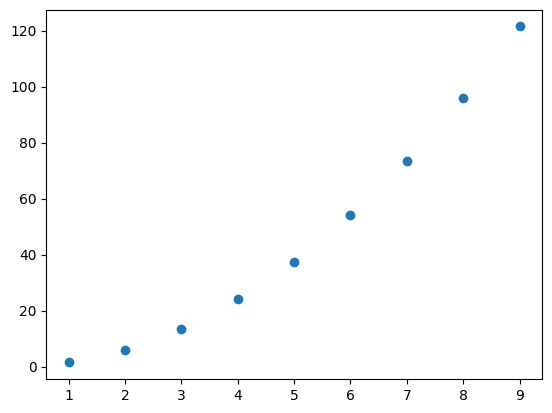

In [27]:
plt.scatter(ns, ds)

## 多元微积分

In [5]:
x,y,z,u1,u2,u3,v1,v2,v3,t = smp.symbols('x y z u1 u2 u3 v1 v2 v3 t')

### 向量和几何

In [30]:
u=smp.Matrix([u1,u2,u3])
v=smp.Matrix([v1,v2,v3])

In [31]:
u

Matrix([
[u1],
[u2],
[u3]])

In [32]:
v

Matrix([
[v1],
[v2],
[v3]])

In [33]:
2*u+v

Matrix([
[2*u1 + v1],
[2*u2 + v2],
[2*u3 + v3]])

In [34]:
u.dot(v)

u1*v1 + u2*v2 + u3*v3

In [35]:
u.cross(v)

Matrix([
[ u2*v3 - u3*v2],
[-u1*v3 + u3*v1],
[ u1*v2 - u2*v1]])

In [36]:
u.norm()

sqrt(Abs(u1)**2 + Abs(u2)**2 + Abs(u3)**2)

$proj_v(u)=\frac{u\cdot v}{|v|^2}v$

In [39]:
proj_v_u=u.dot(v)/v.norm()**2*v
proj_v_u

Matrix([
[v1*(u1*v1 + u2*v2 + u3*v3)/(Abs(v1)**2 + Abs(v2)**2 + Abs(v3)**2)],
[v2*(u1*v1 + u2*v2 + u3*v3)/(Abs(v1)**2 + Abs(v2)**2 + Abs(v3)**2)],
[v3*(u1*v1 + u2*v2 + u3*v3)/(Abs(v1)**2 + Abs(v2)**2 + Abs(v3)**2)]])

线:$\vec r(t)=\vec r_0 +t\vec v$

In [44]:
r_0=smp.Matrix([1,1,1])
v=smp.Matrix([-3,2,4])
r=r_0+t*v
r

Matrix([
[1 - 3*t],
[2*t + 1],
[4*t + 1]])

平面：$\vec u \cdot(P_0-\langle x,y,z \rangle)=0$

In [47]:
P_0=smp.Matrix([4,8,8])
n=smp.Matrix([1,1,1])
r=smp.Matrix([x,y,z])
n.dot(P_0-r)

-x - y - z + 20

## 向量微积分

### 向量微分

In [50]:
r=smp.Matrix([3*t,smp.sin(t),t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [51]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

上面的向量在三维中随着t变化表达为空间中的螺旋线，\
那么：找出速度和加速度的夹角 ， 表达为以t为变量的函数$f(\theta)$

In [58]:
v=smp.diff(r,t)
a=smp.diff(v,t)
theta = smp.acos( v.dot(a)  / ( v.norm()*a.norm() )  ).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

那么当t=6的时候夹角为多少

In [59]:
theta.subs(t,6).evalf()

0.251108015692338

### 向量积分
注意：由于向量平移不变性，所以结果向量无需添加常数C

In [18]:
r = smp.Matrix( [ smp.exp(t)*smp.cos(t),t**4,1/(1+t**2) ] )
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [19]:
smp.integrate(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

**有些积分是无法使用解析方法解决的**

In [20]:
from scipy.integrate import quad_vec

In [28]:
r = smp.Matrix( [ smp.exp(t**2)*smp.cos(t)**3,  smp.exp(-t**4),   1/(3+t**2) ] )
r
#这个向量就是无法进行解析法积分的例子 
#所以需要lambda化，想方法搞定其数值解

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [30]:
#lambda化 ， 把符号式转为一个数值函数
r_f=smp.lambdify([t],r)
r_f(1)

array([[0.4287508 ],
       [0.36787944],
       [0.25      ]])

In [29]:
#数值的方法进行[0,1]区间积分 其会返回 积分结果 以及 误差
quad_vec(r_f,0,1)

(array([[0.81549671],
        [0.84483859],
        [0.30229989]]),
 4.039233845603321e-14)

### 弧长
$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$
\
这几乎很难找到符号解，找出曲线$\langle 0,t,t^2 \rangle$在$t\in[0,1]$的弧长

In [31]:
r=smp.Matrix([0,t,t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [33]:
smp.integrate(smp.diff(r,t).norm(),(t,0,1))

asinh(2)/4 + sqrt(5)/2

## 例：普通空间电线的磁场
当$\vec r= (x,y,z) , \vec l=(f(t),g(t),h(t)) $给出了空间曲线的位置\
空间某点r的磁场公式如下\
$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$
 


第一问：使用sympy找到表达为三维向量的积分结果

In [35]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

In [36]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)

In [37]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3

In [38]:
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

第二问：找到一处磁场，磁场中心上方H高的地方的一个以R为半径顺时针环形区域的磁场

In [40]:
R, H = smp.symbols('R, H', real=True)

In [41]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

In [42]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

## 偏微分
$f(x,y)=y^2\sin(x+y)$对x,y的偏微分

In [48]:
x, y = smp.symbols('x, y', real=True)
f=y**2*smp.sin(x+y)
f

y**2*sin(x + y)

In [52]:
f.diff(x)
smp.diff(f,x)

y**2*cos(x + y)

In [54]:
f.diff(y)
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

如果是更复杂的$\frac{\partial^2 f}{\partial x y^2}$

In [55]:
f.diff(x,y,y)
smp.diff(f,x,y,y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

## 链式法则

In [57]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* 假设 $x$, $y$,  $z$ 是 $t$ 的函数 
* $w$ 的变量为 $x$, $y$, $z$， 比如 $w=w(x,y,z)$

找出 $dw/dt$

In [59]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [62]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [65]:
#放入一个特殊函数
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [66]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## 多重积分
比如
$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

x, y, z =smp.symbols('x, y, z' )
f=x
smp.integrate(f,(z,3,4-x**2-y**2),(y,0,1-x**2),(x,0,1))

# 拉格朗日运动力学方程

拉格朗日力学的一般思想是系统的动能和势能可以用广义坐标和速度来表示

$$T = T(q,\dot{q}) \hspace{20mm} V=V(q,\dot{q})$$

其中 $q$ 可以是点粒子的 xyz，也可以是某个角度 $theta$（钟摆），或者任何使问题最容易解决的东西，定义 $L=T-V$，以下方程给出运动方程 $q(t)$

$$\frac{dL}{dq} - \frac{d}{dt}\frac{dL}{d\dot{q}} = 0 $$

对于系统的所有不同$q$。上面的等式给出了所有不同$q(t)$的二阶微分方程。

**示例**：以微分方程的形式,求运动方程 

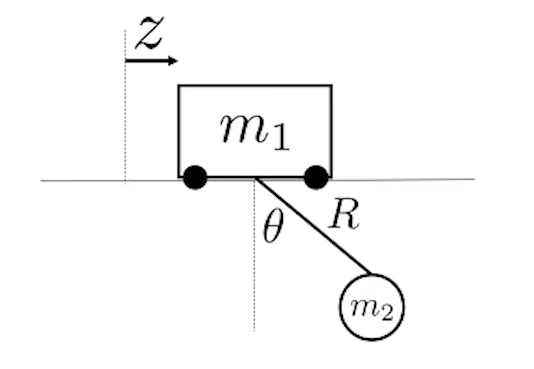

 $(x,y)$ 是摆锤摆动的位置

In [93]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta,t)

定义钟摆的位置

In [94]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)
y

-R*cos(\theta(t))

动能和势能

In [95]:
T1 = smp.Rational(1,2) * m1 * smp.diff(z,t)**2
T2 = smp.Rational(1,2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
T = T1 + T2
V1 = 0
V2 = m2*g*y
V = V1 + V2

In [96]:
L=T-V
L

R*g*m_2*cos(\theta(t)) + m_1*Derivative(z(t), t)**2/2 + m_2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))**2)/2

获取拉格朗日运动方程

In [97]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L,dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L,dthedt), t)

In [98]:
LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

In [99]:
LE2

-R*g*m_2*sin(\theta(t)) + m_2*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t))/2 - m_2*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(z(t), (t, 2)))*cos(\theta(t)))/2

我们想要可以求解的两个二阶微分方程组

In [100]:
sols = smp.solve([LE1, LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])
sols

{Derivative(\theta(t), (t, 2)): -R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2),
 Derivative(z(t), (t, 2)): R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)}

找到 $d^2 \theta / dt^2 = $

In [101]:
sols[smp.diff(theta,t,t)]

-R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)

 找到 $d^2 z / dt^2 = $

In [102]:
sols[smp.diff(z,t,t)]

R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)

有了这两个二阶微分方程，就可以对系统进行数值求解了

# 伽辽金方法


伽辽金方法是解微分方程的一种方法 ，属于加权余量法的重要常用分支

1 选取近似解， 需要满足边界条件

2 求出余量

3 选择权函数 确定权函数系数



### 举例

已知微分方程

$$
\frac{d^2u}{dx^2}-u=-x,0<x<1 
$$
且
$$
u(0)=0,u(1)=0
$$

我们已知有解析的精确解
$$
u(x)=x-\frac{e^x-e^{-x}}{e-e^{-1}}
$$

### 开始伽辽金操作

伽辽金选择的权函数为
$$
\omega_i=\frac{d \tilde u}{dC_i}
$$


然后多项式拟制一个一次近似解 我们可以从一次开始 需要满足边界条件 C1是待定的系数
$$
\tilde u = C_1x(1-x)
$$
权函数为
$$
x(1-x)
$$

近似解带入方程  
$$
R = \frac{d^2\tilde u}{dx^2}-u+x = 2C_1 - C_1x(1-x)+x
$$

然后构造定积分 求系数C1
$$
I=\int_0^1 \omega_1 Rdx = \int_0^1 x(1-x)  [2C_1 - C_1x(1-x)+x ]dx=0
$$

计算该定积分 解方程
$$
C_1 =\frac3{13}
\tilde u = \frac3{13}x(1-x) 
$$

于是近似解也就出来了


## 伽辽金 使用一次近似解

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

1/12 - 11*C1/30
5/22
5*x*(1 - x)/22


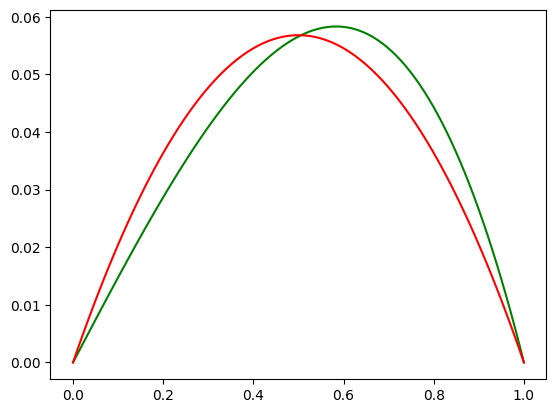

In [2]:
# 伽辽金方法  
# 参数设定
u=smp.symbols('u',cls=smp.Function)
x=smp.symbols('x',real=True)
C1=smp.symbols('C1') 

# expr 构建近似多项式uH   以及近似解对系数的倒数w
uH=C1*x*(1-x)  
w=smp.diff(uH,C1)

# 近似多项式带入构建方程exprR  并得到定积分结果式子expr
exprR =w*( smp.diff(smp.diff(uH,x),x)-uH+x )
expr=smp.integrate(exprR,(x,0,1)).doit()
print(expr)

#将上述定积分结果式子趋于0 并 解方程equation的系数C1
equation=smp.Eq(expr,0) 
ttr=smp.solve(equation,C1)  
ceoff1=ttr[0] 
print(ceoff1)

# 得出近似多项式实际样貌
uH=ceoff1*x*(1-x) 
print(uH)

# 已知解析解
std = x - (smp.exp(x)-smp.exp(-x))/(smp.exp(1)-smp.exp(-1))
std

# 解析解 和 近似解 两者函数化
std_f=smp.lambdify([x],std)
uH_f=smp.lambdify([x],uH)

#显示两条曲线
x_num=np.linspace(0,1,100) 
plt.plot(x_num,std_f(x_num),color='green')
plt.plot(x_num,uH_f(x_num),color='red')
plt.show()

## 伽辽金 使用二次近似解

{C1: 69/473, C2: 7/43}
7*x**2*(1 - x)/43 + 69*x*(1 - x)/473


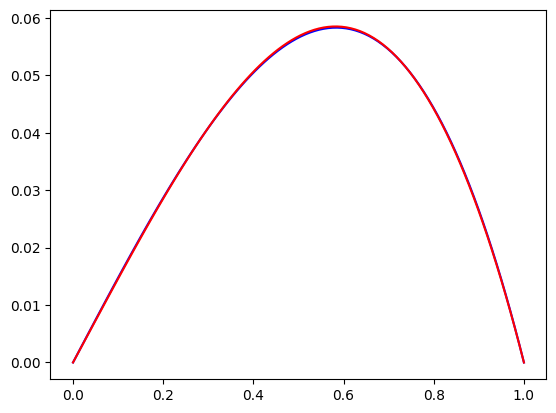

In [18]:
# 伽辽金方法 2
# 参数设定 
x=smp.symbols('x',real=True)
C1=smp.symbols('C1',real=True)
C2=smp.symbols('C2',real=True)

# expr 构建近似多项式uH   以及近似解对系数的倒数w
uH=C1*x*(1-x)  + C2*x**2*(1-x) 
w1=smp.diff(uH,C1)
w2=smp.diff(uH,C2)

# 近似多项式带入构建方程exprI1  并得到定积分结果式子expr1 
exprI1=smp.integrate(w1* (smp.diff(smp.diff(uH,x),x)-uH+x),(x,0,1)) .doit() 
#式子exprI2
exprI2=smp.integrate(w2* (smp.diff(smp.diff(uH,x),x)-uH+x),(x,0,1)).doit() 

# expr1 expr2  联立解方程
coeff=smp.solve([exprI1,exprI2],[C1,C2])  
print(coeff)
# 得出近似多项式实际样貌
uH=uH.subs([(C1,coeff[C1]),(C2,coeff[C2])])
print(uH)
# 已知解析解
std = x - (smp.exp(x)-smp.exp(-x))/(smp.exp(1)-smp.exp(-1))
std

# 解析解 和 近似解 两者函数化
std_f=smp.lambdify([x],std)
uH_f=smp.lambdify([x],uH)

#显示两条曲线
x_num=np.linspace(0,1,100) 
plt.plot(x_num,std_f(x_num),color='blue')
plt.plot(x_num,uH_f(x_num),color='red')
plt.show()

#### 把伽辽金法打包为方法

7*x**2*(1 - x)/43 + 69*x*(1 - x)/473
7*x**2*(1 - x)/43 + 69*x*(1 - x)/473


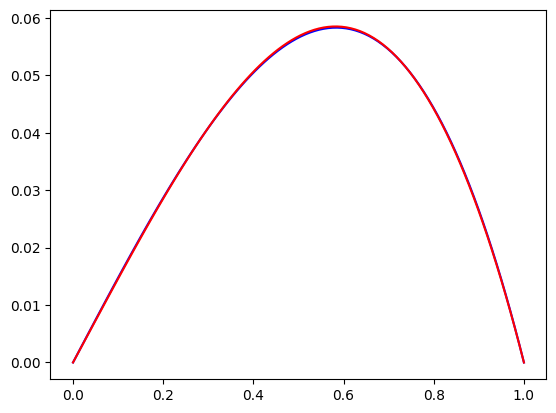

In [24]:

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

##############
##############一元伽辽金方法
#expr=(smp.diff(smp.diff(uH,x),x)-uH+x)
#coeffs=[smp.symbols('C1',real=True),smp.symbols('C2',real=True)]
#approxExpr =uH=   C1*x*(1-x)  + C2*x**2*(1-x) 
#limit=(x,0,1)
def Galerkin(expr ,coeffs,approxExpr,limit) : 
    exprIs=[] 
    for coeff in  coeffs:
        w=smp.diff(approxExpr,coeff)
        # ws.append(smp.diff(approxExpr,coeff)) 
        exprI=smp.integrate(w* expr,limit) .doit() 
        exprIs.append(exprI)

    coeffDict=smp.solve(exprIs,coeffs)  
 
    for coeff in  coeffs:  
        approxExpr=approxExpr.subs([(coeff,coeffDict[coeff])]) 
    print(approxExpr)
    approxExprFunc=smp.lambdify([limit[0]],approxExpr)
    return( approxExpr, approxExprFunc)
##############   
##############

################## # 伽辽金方法 验证
C1=smp.symbols('C1',real=True)
C2=smp.symbols('C2',real=True)
coeffs=[C1,C2]

x=smp.symbols('x',real=True)
limit=(x,0,1)
uH=C1*x*(1-x)  + C2*x**2*(1-x) 
expr=(smp.diff(smp.diff(uH,x),x)-uH+x)

approxExpr = Galerkin(expr,coeffs,uH,limit)
uH = approxExpr[0]
print(uH) 
################## #

# 已知解析解
std = x - (smp.exp(x)-smp.exp(-x))/(smp.exp(1)-smp.exp(-1))
std

# 解析解 和 近似解 两者函数化
std_f=smp.lambdify([x],std)
uH_f=smp.lambdify([x],uH)
##########
#显示两条曲线
x_num=np.linspace(0,1,100) 
plt.plot(x_num,std_f(x_num),color='blue')
plt.plot(x_num,uH_f(x_num),color='red')
plt.show()